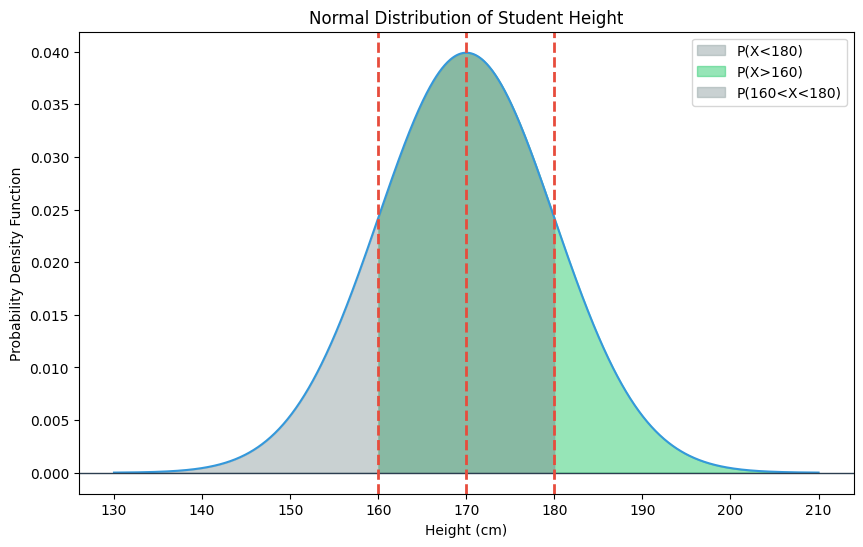

P(X<180) = 0.8413447460685429
P(X>160) = 0.8413447460685429
P(160<X<180) = 0.6826894921370859


In [7]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

#given parameters
mean=170       #mean 
sigma= 10    #standard deviation

#height to calculate
x_values = np.linspace(mean - 4*sigma, mean + 4*sigma, 1000)

#compute normal distribution
pdf_values = st.norm.pdf(x_values, mean, sigma)

#plot bell curve
plt.figure(figsize=(10, 6))
plt.plot(x_values, pdf_values, color='#3498db')

#shade area for P(X<180)
px_180 = st.norm.cdf(180, mean, sigma)
plt.fill_between(x_values, pdf_values, where=(x_values <= 180), color='#95a5a6', alpha=0.5, label='P(X<180)')

#shade area for P(X>160)
px_160 = st.norm.cdf(160, mean, sigma)
plt.fill_between(x_values, pdf_values, where=(x_values >= 160), color='#2ecc71', alpha=0.5, label='P(X>160)')

#shade area for P(160<X<180)
px_160_180 = st.norm.cdf(180, mean, sigma) - st.norm.cdf(160, mean, sigma)
plt.fill_between(x_values, pdf_values, where=(x_values > 160) & (x_values < 180), color='#95a5a6', alpha=0.5, label='P(160<X<180)')

#add labels and title
plt.xlabel('Height (cm)'), plt.ylabel('Probability Density Function')
plt.title('Normal Distribution of Student Height')
plt.legend()

#adding scale
plt.axhline(0, color='#2c3e50', lw=1)
plt.axvline(mean, color='#e74c3c', lw=2, ls='dashed')
plt.axvline(mean + sigma, color='#e74c3c', lw=2, ls='dashed')
plt.axvline(mean - sigma, color='#e74c3c', lw=2, ls='dashed')

#show plot
plt.show()

print("P(X<180) =", px_180)
print("P(X>160) =", 1 - px_160)
print("P(160<X<180) =", px_160_180)